In [ ]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__

'2.15.0'

In [ ]:
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cpu

Looking in indexes: https://download.pytorch.org/whl/cpu


In [ ]:
ROOT="/content/drive/MyDrive/Colab Notebooks"

In [ ]:
import os
os.chdir(ROOT)

In [ ]:
os.getcwd()

'/content/drive/MyDrive/Colab Notebooks'

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import joblib
import pandas as pd

plt.style.use("fivethirtyeight")

In [ ]:
class perceptron:
  def __init__(self, eta, epochs, actFunc): #eta learning rate
    self.weights = np.random.randn(3)*1e-4
    print(f"self.weights: {self.weights}")
    self.eta = eta
    self.epochs = epochs
    self.actFunc = actFunc

  def fit(self, X, y):
    x_with_bias = np.c_[X ,-np.ones((len(X),1))] #concatination
    print(f"X_with_bias: \n{x_with_bias}")

    for epoch in range(self.epochs):
      print(f"for epoch: {epoch}")
      y_hat = self.actFunc(x_with_bias, self.weights)
      print(f"predicted value: \n{y_hat}")
      error = y - y_hat
      print(f"error: \n{error}")
      self.weights = self.weights + self.eta * np.dot(x_with_bias.T, error)
      print(f"updated weights: \n{self.weights}")
      print("#############\n")
  def predict(self, X):
    x_with_bias = np.c_[X, -np.ones((len(X), 1))]
    return self.actFunc(x_with_bias, self.weights)

In [ ]:
def actFunc(inputs, weights):
    z = np.dot(inputs, weights)
    y_hat = np.where(z > 0, 1, 0)
    return y_hat

In [ ]:
data = {"x1":[0,0,1,1],"x2":[0,1,0,1],"y":[0,0,0,1]}

AND = pd.DataFrame(data)
AND

,x1,x2,y
0,0,0,0
1,0,1,0
2,1,0,0
3,1,1,1


In [ ]:
X = AND.drop('y',axis = 1)

In [ ]:
X

,x1,x2
0,0,0
1,0,1
2,1,0
3,1,1


In [ ]:
y=AND['y']
y.to_frame()

,y
0,0
1,0
2,0
3,1


In [ ]:
model = perceptron(eta = 0.01, epochs = 10, actFunc = actFunc)

self.weights: [2.40795733e-04 3.58186413e-05 8.84667298e-05]


In [ ]:
model.fit(X,y)

X_with_bias: 
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
for epoch: 0
predicted value: 
[0 0 1 1]
error: 
0    0
1    0
2   -1
3    0
Name: y, dtype: int64
updated weights: 
[-9.75920427e-03  3.58186413e-05  1.00884667e-02]
#############

for epoch: 1
predicted value: 
[0 0 0 0]
error: 
0    0
1    0
2    0
3    1
Name: y, dtype: int64
updated weights: 
[2.40795733e-04 1.00358186e-02 8.84667298e-05]
#############

for epoch: 2
predicted value: 
[0 1 1 1]
error: 
0    0
1   -1
2   -1
3    0
Name: y, dtype: int64
updated weights: 
[-9.75920427e-03  3.58186413e-05  2.00884667e-02]
#############

for epoch: 3
predicted value: 
[0 0 0 0]
error: 
0    0
1    0
2    0
3    1
Name: y, dtype: int64
updated weights: 
[0.0002408  0.01003582 0.01008847]
#############

for epoch: 4
predicted value: 
[0 0 0 1]
error: 
0    0
1    0
2    0
3    0
Name: y, dtype: int64
updated weights: 
[0.0002408  0.01003582 0.01008847]
#############

for epoch: 5
predicted value: 
[0 0 0 1]
error: 

In [ ]:
model.predict(X)

array([0, 0, 0, 1])

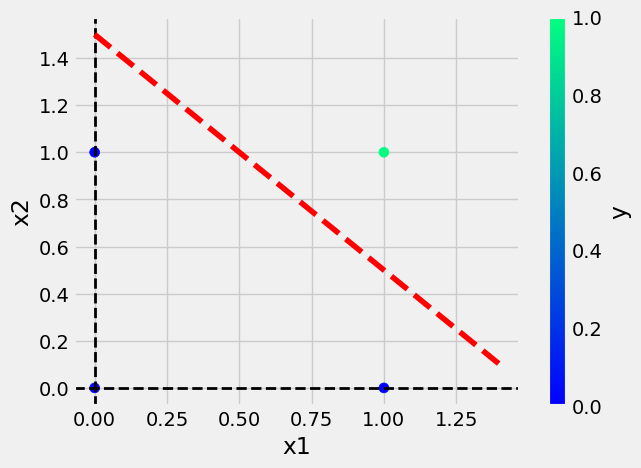

In [ ]:
AND.plot(kind="scatter", x="x1", y="x2", c="y", s=50, cmap="winter")
plt.axhline(y=0, color="black", linestyle="--", linewidth=2)
plt.axvline(x=0, color="black", linestyle="--", linewidth=2)

x = np.linspace(0, 1.4) # >>> 50
y = 1.5 - 1*np.linspace(0, 1.4) # >>> 50

plt.plot(x, y, "r--")